<img align="left" width="300" height="300" src="img/dolan.png">

# Exploratory Data Analysis (EDA) using Python
<span style="color:darkblue">This Jupyter notebook is submitted by Anir Chakraborty, Peter Groglio and Harrison Buuzzi on Dec-04-2018 as the final project in partial fulfillment of the requirements for **BA 505, Python for Analytics** at the Dolan School of Business Fairfield University, 2017-2019. 

<span style="color:darkblue">The project objectives are threefold, as outlined in the course agenda:
Apply Python skills to a student-selected analytical project of moderate (but nontrivial) scope and complexity, demonstrate mastery of Python, NumPy, Pandas, Matplolib, Jupyter, GitHub and finally to work in teams, with professional-quality tools and standards.

<span style="color:darkblue">Additionally, the Jupyter notebook here shares the source of data , tries to preprocess the data to do basic exploratory data analysis (EDA), highlights probable research questions, the challenges anticipated and finally visualizes the results through matplotlib and seaborn libraries, all pieces tying together telling a story.


#### Data Source 
https://catalog.data.gov/dataset/traffic-violations-56dda <span style="color:darkblue">The dataset contains traffic violation information from all electronic traffic violations issued in the Montgomery County of Maryland. Any information that can be used to uniquely identify the vehicle, the vehicle owner or the officer issuing the violation is not published. This dataset is intended for public access and use.

<span style="color:darkblue"> Import all necessary packages and modules. The IPCompleter.greedy configuration enables intellisense in the Jupyter notebook. The matlplotlib inline function renders the plot within the Jupyter notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


<span style="color:darkblue">A folder/dir *ba500package* is created as part of the project reproducibility feature, that includes a __init__.py file (to let Python know that ba500 is a package, and the data.py module containing the data retrieval function. The function downloads the huge data file only once , in the event it is not present in the data folder. (See Ref [2]). Quick preview of the first 5 rows of the data set with the head() method

#### Load Dataset
<span style="color:darkblue"> The first download takes a bit of a time partly because there are 1.5 million rows in the dataset, and also due to the fact that it's parsing the date_of_stop and time_of_stop columns as datetimes row by row. There were examples in the Ref[2] article that said converting to datetime later after creating the index as is, considerably speeded the process.

In [4]:
from ba500package.data import get_county_data

data = get_county_data()
data.head()

,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
Date Of Stop_Time Of Stop,,,,,,,,,,,,,,,,,,,,,
2013-09-24 17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
2017-08-29 10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2014-12-01 12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,Yes,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
2017-08-29 09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,Yes,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
2017-08-28 23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


#### Explore Data

<span style="color:darkblue"> List the available fields

In [5]:
data.columns

Index(['Agency', 'SubAgency', 'Description', 'Location', 'Latitude',
       'Longitude', 'Accident', 'Belts', 'Personal Injury', 'Property Damage',
       'Fatal', 'Commercial License', 'HAZMAT', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')

#### Clean Data
<span style="color:darkblue">Get info of datatype and count of each column to determine what kind of data and how consistently populated the data is

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1418223 entries, 2013-09-24 17:11:00 to 2018-11-26 11:33:00
Data columns (total 33 columns):
Agency                     1418223 non-null object
SubAgency                  1418213 non-null object
Description                1418214 non-null object
Location                   1418221 non-null object
Latitude                   1314870 non-null float64
Longitude                  1314870 non-null float64
Accident                   1418223 non-null object
Belts                      1418223 non-null object
Personal Injury            1418223 non-null object
Property Damage            1418223 non-null object
Fatal                      1418223 non-null object
Commercial License         1418223 non-null object
HAZMAT                     1418223 non-null object
Commercial Vehicle         1418223 non-null object
Alcohol                    1418223 non-null object
Work Zone                  1418223 non-null object
State                      1418164 n

<span style="color:darkblue">Though the above *info* command tells you the missing rows, the **isnull()** function detrmines if there is any null data for each of the columns

In [7]:
pd.isnull(data).any()

Agency                     False
SubAgency                   True
Description                 True
Location                    True
Latitude                    True
Longitude                   True
Accident                   False
Belts                      False
Personal Injury            False
Property Damage            False
Fatal                      False
Commercial License         False
HAZMAT                     False
Commercial Vehicle         False
Alcohol                    False
Work Zone                  False
State                       True
VehicleType                False
Year                        True
Make                        True
Model                       True
Color                       True
Violation Type             False
Charge                     False
Article                     True
Contributed To Accident    False
Race                       False
Gender                     False
Driver City                 True
Driver State                True
DL State  

In [8]:
data.iloc[:, list(range(9)) + [-1]].head()

,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Geolocation
Date Of Stop_Time Of Stop,,,,,,,,,,
2013-09-24 17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,NaN
2017-08-29 10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,No,"(38.981725, -77.0927566666667)"
2014-12-01 12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,"(39.1628883333333, -77.2290883333333)"
2017-08-29 09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,"(39.056975, -76.9546333333333)"
2017-08-28 23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,No,NaN


<span style="color:darkblue">Drop rows with missing values. We can see that most columns have similar numbers of values besides Latitude, Longitude and Geolocation.We need to make a dtermination if we fill in the blanks with dummy values or drop those rows altogether. We should be careful that we rae not dropping importnt data points that might be needed for our analysis later on. But to keep things simple and due to the fact that we have almost 1.5 million rows, it will be best to have the exact same number of values for each field. We'll go ahead and make sure that every single cell has a value by doing a bulk dropna() function call.

In [9]:
data_clean= data.dropna()

<span style="color:darkblue"> Using **iloc** function look for the fields/columns not showing up through  head()

In [10]:
data.iloc[:,10:23].head()

,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type
Date Of Stop_Time Of Stop,,,,,,,,,,,,,
2013-09-24 17:11:00,No,No,No,No,No,No,MD,02 - Automobile,2008.0,FORD,4S,BLACK,Citation
2017-08-29 10:19:00,No,No,No,No,No,No,VA,02 - Automobile,2001.0,TOYOTA,COROLLA,GREEN,Citation
2014-12-01 12:52:00,No,No,No,No,No,No,MD,02 - Automobile,2001.0,HONDA,ACCORD,SILVER,Citation
2017-08-29 09:22:00,No,No,No,No,No,No,MD,02 - Automobile,1998.0,DODG,DAKOTA,WHITE,Citation
2017-08-28 23:41:00,No,No,No,No,No,No,MD,02 - Automobile,2015.0,MINI COOPER,2S,WHITE,Citation


In [11]:
data.iloc[:,23:33].head()

,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
Date Of Stop_Time Of Stop,,,,,,,,,,
2013-09-24 17:11:00,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
2017-08-29 10:19:00,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2014-12-01 12:52:00,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
2017-08-29 09:22:00,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
2017-08-28 23:41:00,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


<span style="color:darkblue">Rerun the info and isnull functions on the clean dataset to see that there are no nulls

In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1232104 entries, 2017-08-29 10:19:00 to 2018-11-25 15:14:00
Data columns (total 33 columns):
Agency                     1232104 non-null object
SubAgency                  1232104 non-null object
Description                1232104 non-null object
Location                   1232104 non-null object
Latitude                   1232104 non-null float64
Longitude                  1232104 non-null float64
Accident                   1232104 non-null object
Belts                      1232104 non-null object
Personal Injury            1232104 non-null object
Property Damage            1232104 non-null object
Fatal                      1232104 non-null object
Commercial License         1232104 non-null object
HAZMAT                     1232104 non-null object
Commercial Vehicle         1232104 non-null object
Alcohol                    1232104 non-null object
Work Zone                  1232104 non-null object
State                      1232104 n

In [13]:
df = pd.DataFrame({'DateOfStop' : [],'TimeOfStop':[]})
df['DateOfStop'] = [d.date() for d in data.index]
df['TimeOfStop'] = [d.time() for d in data.index]
df.set_index(pd.to_datetime(df['DateOfStop']),drop=False,inplace=True)
df.index.name = 'Date'
df.head()

,DateOfStop,TimeOfStop
Date,,
2013-09-24,2013-09-24,17:11:00
2017-08-29,2017-08-29,10:19:00
2014-12-01,2014-12-01,12:52:00
2017-08-29,2017-08-29,09:22:00
2017-08-28,2017-08-28,23:41:00


In [14]:
df['DateOfStop'].value_counts().head()

2015-03-17    1281
2018-04-10    1277
2014-05-20    1222
2018-04-18    1184
2015-11-24    1169
Name: DateOfStop, dtype: int64

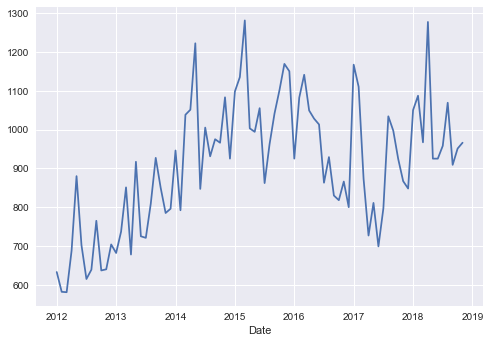

In [15]:
plt.style.use('seaborn')
df1 = df.groupby(['Date']).size()
df1.resample('M').max().plot()

<span style="color:darkblue">This shows that March 17, 2017 was the date that the most stops occured. We hypothesized that maybe Thanksgiving or Christmas Eve would be the day with the most violations due to drinking from holliday parties and increase in traveling. This result does still meet our hypothesis in a way since this was the date of St.Patrick's Day in 2017.

In [16]:
df['TimeOfStop'].value_counts().head()

23:30:00    2126
22:53:00    2115
23:00:00    2106
23:20:00    2091
22:57:00    2087
Name: TimeOfStop, dtype: int64

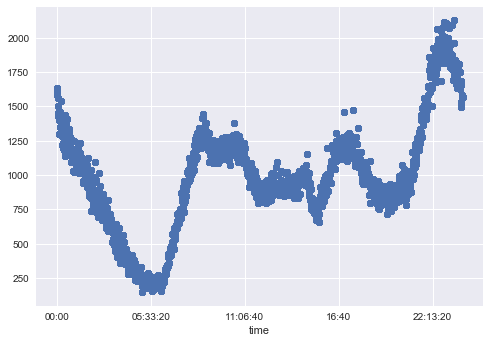

In [17]:
df.index.drop
df.set_index(pd.to_datetime(df['TimeOfStop'],format='%H:%M:%S').dt.time,drop=False,inplace=True)
df.index.name = 'Time'
df['GroupbyTime'] = df['TimeOfStop'].value_counts()
df.head()
plt.style.use('seaborn')
plt.plot_date(df['TimeOfStop'],df['GroupbyTime'])

<span style="color:darkblue">Our hypothesis that most violations might occur between the hours of 7 AM - 9 AM during people's morning work commutes, is not sup[ported by the data

In [18]:
data['SubAgency'].value_counts()

4th district, Wheaton                              352681
3rd district, Silver Spring                        281981
2nd district, Bethesda                             221801
6th district, Gaithersburg / Montgomery Village    183352
1st district, Rockville                            169210
5th district, Germantown                           162277
Headquarters and Special Operations                 46911
Name: SubAgency, dtype: int64

<span style="color:darkblue">The **4th district, Wheaton** sub-agency was responsible for the  most stops in the Montgomery County during those years in study.

<span style="color:darkblue">Use cartopy or ipyleaflet packages to draw the maps of the location. If these fail, use tableau to show the county map

<span style="color:darkblue"> Lists the traffic violation outcomes, if citation or warning.
The decision to give a warning or a citation is subjective and often at the discretion of the police officer - this couldlead us to analyze bias, but I'm not sure if we have all the data captured for doing this (we do have the gender and race breakdown)

In [19]:
data['Violation Type'].value_counts()

Warning     694073
Citation    653582
ESERO        69669
SERO           899
Name: Violation Type, dtype: int64

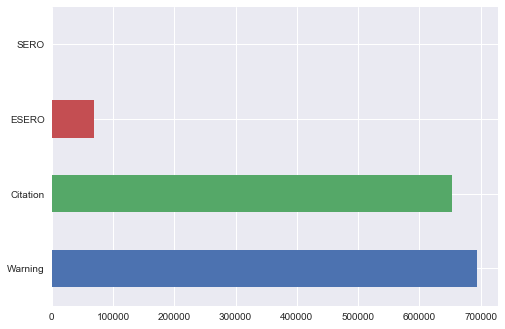

In [20]:
data['Violation Type'].value_counts().plot.barh()

<span style="color:darkblue">More warnings than citations</br>    
<font size="1">SERO - Safety Equipment Repair Order ESERO - Electronic Safety Equipment Repair Order</font>

In [21]:
data['Arrest Type'].value_counts()

A - Marked Patrol                         1172765
Q - Marked Laser                           131137
B - Unmarked Patrol                         45282
S - License Plate Recognition               13764
O - Foot Patrol                             13457
L - Motorcycle                              12280
E - Marked Stationary Radar                  8718
G - Marked Moving Radar (Stationary)         6933
R - Unmarked Laser                           5831
I - Marked Moving Radar (Moving)             2230
M - Marked (Off-Duty)                        2162
H - Unmarked Moving Radar (Stationary)        992
F - Unmarked Stationary Radar                 833
J - Unmarked Moving Radar (Moving)            513
C - Marked VASCAR                             463
P - Mounted Patrol                            332
D - Unmarked VASCAR                           285
N - Unmarked (Off-Duty)                       191
K - Aircraft Assist                            55
Name: Arrest Type, dtype: int64

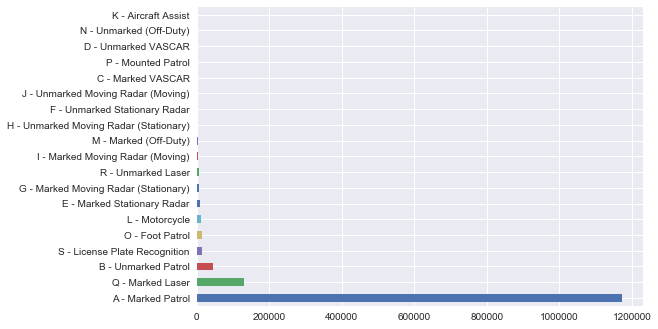

In [22]:
data['Arrest Type'].value_counts().plot.barh()

<span style="color:darkblue">Marked Patrol policing were the ones who caught almost all the violations

In [23]:
data['Gender'].value_counts()

M    950447
F    466096
U      1680
Name: Gender, dtype: int64

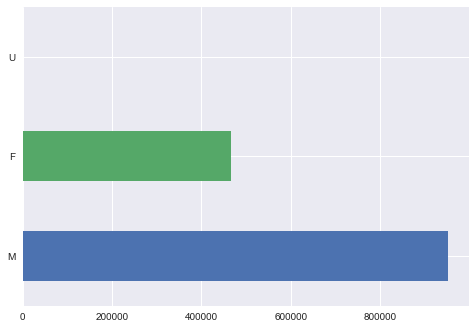

In [24]:
data['Gender'].value_counts().plot.barh()

<span style="color:darkblue"> Men offenders were more than double the number of women offenders

In [25]:
data['Race'].value_counts()

WHITE              505611
BLACK              448615
HISPANIC           301413
ASIAN               82957
OTHER               76562
NATIVE AMERICAN      3065
Name: Race, dtype: int64

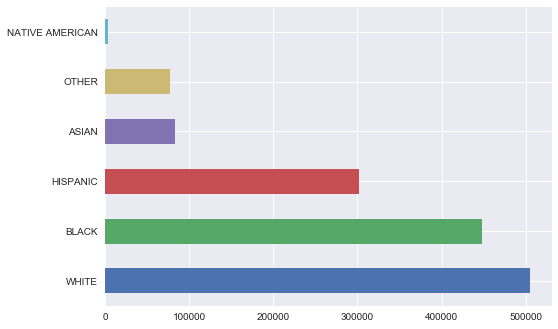

In [26]:
data['Race'].value_counts().plot.barh()

In [27]:
data.groupby(['Gender','Race']).size()

Gender  Race           
F       ASIAN               32069
        BLACK              151228
        HISPANIC            69271
        NATIVE AMERICAN       979
        OTHER               24513
        WHITE              188036
M       ASIAN               50879
        BLACK              297370
        HISPANIC           232103
        NATIVE AMERICAN      2083
        OTHER               50472
        WHITE              317540
U       ASIAN                   9
        BLACK                  17
        HISPANIC               39
        NATIVE AMERICAN         3
        OTHER                1577
        WHITE                  35
dtype: int64

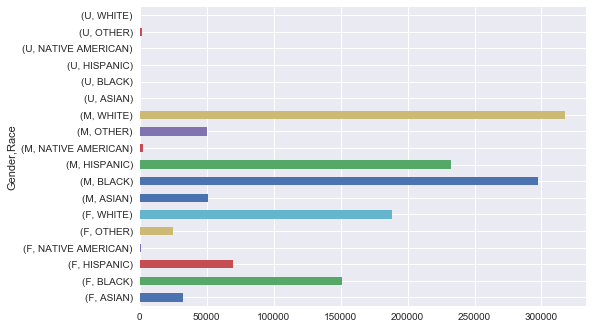

In [28]:
data.groupby(['Gender','Race']).size().plot.barh()

<span style="color:darkblue">Caucasian males recorded the highest number of violations, followed closely by african american males

In [29]:
data['Accident'].value_counts() #0
data['Belts'].value_counts()#46394
data['Alcohol'].value_counts() #2242
data['HAZMAT'].value_counts()  #127
data['Work Zone'].value_counts()#265
data['Work Zone'].value_counts()#265
data['Personal Injury'].value_counts()#16498
data['Property Damage'].value_counts()#27269
data['Fatal'].value_counts()#311

No     1417912
Yes        311
Name: Fatal, dtype: int64

<span style="color:darkblue">We now define 'citations per warning', the ratio of citations to warnings. A higher number signifies a greater likelihood of getting a tictcket instead of getting lucky and just escaping with a warning!

In [30]:
from ba500package.helper import citations_per_warning

In [31]:
data.groupby('Gender').apply(citations_per_warning)

,citations_per_warning
Gender,
F,0.756356
M,1.050878
U,0.156293


In [32]:
data.groupby('Race').apply(citations_per_warning)

,citations_per_warning
Race,
ASIAN,0.686425
BLACK,0.993116
HISPANIC,1.280144
NATIVE AMERICAN,0.814086
OTHER,0.718496
WHITE,0.823772


In [33]:
data.groupby(['Gender','Race']).apply(citations_per_warning)

citations_per_warning
Gender Race                                  
F      ASIAN                         0.599226
       BLACK                         0.823666
       HISPANIC                      0.888538
       NATIVE AMERICAN               0.576592
       OTHER                         0.647204
       WHITE                         0.707282
M      ASIAN                         0.747067
       BLACK                         1.091476
       HISPANIC                      1.431702
       NATIVE AMERICAN               0.952716
       OTHER                         0.787139
       WHITE                         0.901049
U      ASIAN                         1.666667
       BLACK                         2.400000
       HISPANIC                      1.466667
       NATIVE AMERICAN               1.000000
       OTHER                         0.124375
       WHITE                         0.521739

In [34]:
#from ipyleaflet import Marker
import ipyleaflet.marker as mark

center = (52.204793, 360.121558)

m = Map(center=center, zoom=15)

marker = mark(location=center, draggable=False)
m.add_layer(mark);

m

ModuleNotFoundError: No module named 'ipyleaflet'

#### References

[1] http://strftime.org/

[2] http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/

[3] https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

[4] https://www.kaggle.com/tejainece/seaborn-barplot-and-pandas-value-counts

[5] https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

In [35]:
data.iloc[0]

Agency                                                                   MCP
SubAgency                                        3rd district, Silver Spring
Description                DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...
Location                                                     8804 FLOWER AVE
Latitude                                                                 NaN
Longitude                                                                NaN
Accident                                                                  No
Belts                                                                     No
Personal Injury                                                           No
Property Damage                                                           No
Fatal                                                                     No
Commercial License                                                        No
HAZMAT                                                                    No

In [36]:
data[data['Alcohol']=='Yes'].head()

,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
Date Of Stop_Time Of Stop,,,,,,,,,,,,,,,,,,,,,
2017-08-30 19:55:00,MCP,"4th district, Wheaton",FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,No,No,...,16-112(c),Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)"
2017-08-30 19:55:00,MCP,"4th district, Wheaton",DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,No,No,...,16-101(a),Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)"
2017-08-30 19:55:00,MCP,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,No,No,...,16-303(c),Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)"
2017-08-30 19:55:00,MCP,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE WHILE LICENSE SUS...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,No,No,...,16-303(h),Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)"
2017-08-30 19:55:00,MCP,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,No,No,...,16-303(d),Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)"


In [37]:
#data[data['Alcohol']=='Yes'].index
data.loc['2018-10-20 00:01:00',['SubAgency','Description','Accident','Belts','Personal Injury','Property Damage']]

,SubAgency,Description,Accident,Belts,Personal Injury,Property Damage
Date Of Stop_Time Of Stop,,,,,,
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village","DRIVING WHILE LIC. SUSP. UNDER 16-203, 16-206A...",No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",DRIVING VEH. WHILE IMPAIRED BY ALCOHOL,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",FAILURE OF VEH. DRIVER TO STOP AFTER UNATTENDE...,No,No,No,Yes


<span style="color:darkblue">I now want to look at a few fun stats about the cars and what cars are more likely to be pulled over or have a violation. I would like to see if the name "Arrest me red" holds up.

In [70]:
#Trying to see which color car had the most violations
data_color = data.groupby(['Color']).size()
print(data_color)

Color
BEIGE           16262
BLACK          286652
BLUE           103710
BLUE, DARK      29842
BLUE, LIGHT     18635
BRONZE           3287
BROWN            6455
CAMOUFLAGE         28
CHROME             38
COPPER            447
CREAM             880
GOLD            44468
GRAY           157430
GREEN           52522
GREEN, DK       15331
GREEN, LGT       7901
MAROON          24189
MULTICOLOR       1085
ORANGE           5006
PINK              193
PURPLE           2741
RED            111143
SILVER         259739
TAN             28883
WHITE          218952
YELLOW           5339
dtype: int64


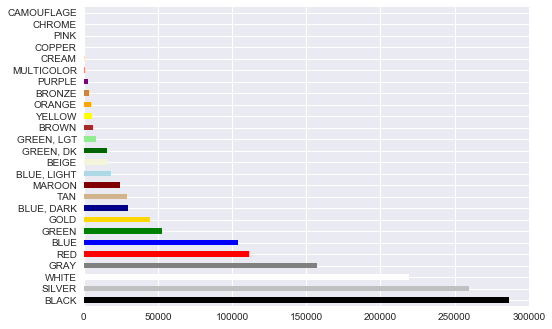

In [69]:
#make a graph showing which color cars are more likely to be pulled over/have an incident
#change all the colors on the graph to match the color car they are representing
data['Color'].value_counts().plot.barh(color=['black', 'silver', 'white', 'gray', 'red', 'blue', 'green', 'gold', 'darkblue', 'tan', 'maroon', 'lightblue', 'beige', 'darkgreen', 'lightgreen', 'brown', 'yellow', 'orange', 'peru', 'purple', 'salmon', 'bisque', 'firebrick', 'pink', 'lightgrey', 'olive'])

<span style="color:darkblue">As we can see Red comes in 5th, however I believe this is becuase the majority of cars on the road are Black, Silver, White or Grey. Red does have the higehst arrest rate out of any of the brighter colors, closely following is blue.

<span style="color:darkblue">Next I want to look at the makes of the cars. I would expect Toyota to be the top becuase they are the most driven vehicle in the country. However, I would expect sports cars could get pulled over more often since they have the ability to drive faster. 

In [107]:
#Find the top 10 makes that had the most violations
data['Make'].value_counts().head(10)

TOYOTA    161399
HONDA     152799
FORD      132534
TOYT       79348
NISSAN     75714
HOND       53610
CHEV       42893
BMW        39004
DODGE      37724
CHEVY      32360
Name: Make, dtype: int64

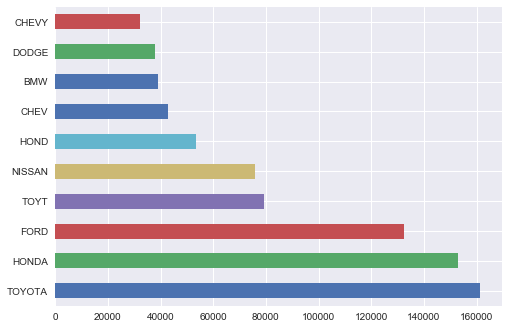

In [108]:
#plot it to show
data['Make'].value_counts().head(10).plot.barh()

<span style="color:darkblue">Toyota has the highest amount of violations which was expected. The only real sports car make in the top 10 is BMW, however Nissan, Chevy and Dodge also make some sports cars. 

In [135]:
driver_state = pd.DataFrame(data['Driver State'].value_counts().head(50))
state_names = pd.Series(['Maryland', 'DC', 'Virginia', 'Pennsylvaina', 'Florida', 'New York', 'North Carolina', 'West Virginia', 'California', 'New Jersey', 'Texas', 'Georgia', 'Massachusetts', 'Delaware', 'Ohio', 'Illinois', 'Canada', 'South Carolina', 'Connecticut', 'Michigan', 'Washington', 'Tennessee', 'Colorado', 'Arizona', 'Indiana', 'Alabama', 'Missouri', 'Louisiana', 'Mississippi', 'Kentucky', 'New Mexico', 'Nevada', 'Minnesota', 'Oklahoma', 'Wisconsin', 'Rhode Island', 'Utah', 'Maine', 'New Hampshire', 'Oregon', 'Ontario', 'Kansas', 'Hawaii', 'Arkansas', 'North Dakota', 'Iowa', 'Vermont', 'Alaska', 'Nebraska', 'Montana'])
print(driver_state)

    Driver State
MD       1280558
DC         45424
VA         44043
PA          7387
FL          5048
NY          4376
NC          3446
WV          3032
CA          2727
NJ          2297
TX          2040
GA          1993
MA          1483
DE          1294
OH          1270
IL           950
XX           923
SC           914
CT           734
MI           718
WA           699
TN           599
CO           537
AZ           489
IN           436
AL           388
MO           368
LA           299
MS           241
KY           236
NM           229
NV           223
MN           217
OK           206
WI           206
RI           183
UT           181
ME           175
NH           168
OR           159
ON           157
KS           141
HI           117
AR           105
ND           102
IA            97
VT            92
AK            79
NE            76
MT            67


In [127]:
import os

In [137]:
import folium
m = folium.Map(location=[48, -102], zoom_start=3)
state_geo = os.path.join('/Desktop/IS505/folium/examples/data', 'us-states.json') 

m = folium.Map(location=[48, -102], zoom_start=3)
m

In [136]:
# Import folium
import folium
m = folium.Map(location=[48, -102], zoom_start=3)
state_geo = os.path.join('/Desktop/IS505/folium/examples/data', 'us-states.json') 

m = folium.Map(location=[48, -102], zoom_start=3)

def style_function(feature):
    
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if employed is None else colorscale(employed)
    }

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=driver_state,
    columns=['Driver State'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Drivers from that state'
).add_to(m)

folium.LayerControl().add_to(m)

m

IndexError: list index out of range